In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Tickets Hygiène et Beauté de novembre 2018 sur les magasins de Noyelles et Englos

In [5]:
filename='november_tickets.csv'
df = pd.read_csv(filename)

In [6]:
print(df.dtypes)
df.shape

id_day                        object
sales_channel_unique_code      int64
basket_unique_code             int64
person_unique_code             int64
prd_sku_unique_code            int64
prd_item_unique_code           int64
nomenclature_lvl1_sde         object
nomenclature_lvl2_sde         object
nomenclature_lvl3_sde         object
nomenclature_lvl4_sde         object
prd_sku_sde                   object
BRAND_SECONDARY               object
top_ownbrand                   int64
product_qty                    int64
final_amt_w_disc_w_tax       float64
dtype: object


(156957, 15)

In [7]:
df.head()

,id_day,sales_channel_unique_code,basket_unique_code,person_unique_code,prd_sku_unique_code,prd_item_unique_code,nomenclature_lvl1_sde,nomenclature_lvl2_sde,nomenclature_lvl3_sde,nomenclature_lvl4_sde,prd_sku_sde,BRAND_SECONDARY,top_ownbrand,product_qty,final_amt_w_disc_w_tax
0,2018-11-23,1,6901000060000003899,107362230,4686692,3600523463671,PERFUMERY - BEAUTY,MAKE-UP,EYE MAKE-UP,EYE MAKE-UP - MASCARAS,L OREAL BL MASCARA INFAILLIBLEPRO VOLUME UNLIM...,INFAILLIBLE,0,1,11.99
1,2018-11-09,1,6887000060000001085,2376218,4686692,3600523463671,PERFUMERY - BEAUTY,MAKE-UP,EYE MAKE-UP,EYE MAKE-UP - MASCARAS,L OREAL BL MASCARA INFAILLIBLEPRO VOLUME UNLIM...,INFAILLIBLE,0,1,10.95
2,2018-11-26,1,6904000060000004348,99332951,4686692,3600523463671,PERFUMERY - BEAUTY,MAKE-UP,EYE MAKE-UP,EYE MAKE-UP - MASCARAS,L OREAL BL MASCARA INFAILLIBLEPRO VOLUME UNLIM...,INFAILLIBLE,0,1,11.99
3,2018-11-02,1,6880000060000007261,-5,4686692,3600523463671,PERFUMERY - BEAUTY,MAKE-UP,EYE MAKE-UP,EYE MAKE-UP - MASCARAS,L OREAL BL MASCARA INFAILLIBLEPRO VOLUME UNLIM...,INFAILLIBLE,0,1,10.95
4,2018-11-05,1,6883000050000004842,3804366,4686692,3600523463671,PERFUMERY - BEAUTY,MAKE-UP,EYE MAKE-UP,EYE MAKE-UP - MASCARAS,L OREAL BL MASCARA INFAILLIBLEPRO VOLUME UNLIM...,INFAILLIBLE,0,1,11.13


In [63]:
416 145 730

416145730

In [8]:
df.loc[df['basket_unique_code']==6879000050000000244]

,id_day,sales_channel_unique_code,basket_unique_code,person_unique_code,prd_sku_unique_code,prd_item_unique_code,nomenclature_lvl1_sde,nomenclature_lvl2_sde,nomenclature_lvl3_sde,nomenclature_lvl4_sde,prd_sku_sde,BRAND_SECONDARY,top_ownbrand,product_qty,final_amt_w_disc_w_tax
26344,2018-11-01,1,6879000050000000244,-5,3826829,3600530733248,PERFUMERY - BEAUTY,MAKE-UP,FACE MAKE-UP,FACE MAKE-UP #,MAYBELLINE NU 22 TEINT ANTICERNE IAA EFFACEUR ...,MAYBELLINE,0,1,11.85
99398,2018-11-01,1,6879000050000000244,-5,4300120,3245678565179,PERFUMERY - BEAUTY,MAKE-UP,NAIL MAKE-UP,NAIL MAKE-UP #,COSMIA BASE NAIL POLISH,COSMIA DPC,1,1,4.06


COMPTAGE

In [9]:
print('Nbr of Products toutes marques confondues:', df['prd_item_unique_code'].nunique())
print('Nbr of Lvl4 :', df['nomenclature_lvl4_sde'].nunique())
print('Nbr of Lvl3 :', df['nomenclature_lvl3_sde'].nunique())
print('Nbr of Lvl2 :', df['nomenclature_lvl2_sde'].nunique())

Nbr of Products toutes marques confondues: 5549
Nbr of Lvl4 : 69
Nbr of Lvl3 : 39
Nbr of Lvl2 : 16


In [10]:
print('Nbr de produits Cosmia :', df.loc[df['top_ownbrand'] == 1].prd_item_unique_code.nunique())

Nbr de produits Cosmia : 713


In [11]:
df_t = df.groupby("basket_unique_code")[['nomenclature_lvl4_sde','nomenclature_lvl3_sde','nomenclature_lvl2_sde','nomenclature_lvl1_sde','prd_item_unique_code']].nunique().reset_index()

In [81]:
from scipy.sparse import csr_matrix
df.set_index("basket_unique_code")
x = csr_matrix(pd.get_dummies(df["prd_item_unique_code"]))

<156957x5549 sparse matrix of type '<class 'numpy.uint8'>'
	with 156957 stored elements in Compressed Sparse Row format>

In [83]:
pd.get_dummies(df["prd_item_unique_code"])[0:50]

,3014230000201,3014230010262,3014230021404,3014230022401,3014230558016,3014230560033,3014260208950,3014260214678,3014260219451,3014260225599,...,8718951203266,8718951203914,8718951204034,8718951204072,8718951204195,8718951205611,8718951205680,8718951205765,8718951215054,9005800251141
basket_unique_code,,,,,,,,,,,,,,,,,,,,,
6901000060000003899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6887000060000001085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6904000060000004348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6880000060000007261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6883000050000004842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6892000060000001942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6883000060000004911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6881000050000007872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6902000060000000391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
csr_matrix(pd.get_dummies(df["prd_item_unique_code"]))

<156957x5549 sparse matrix of type '<class 'numpy.uint8'>'
	with 156957 stored elements in Compressed Sparse Row format>

Count element per basket 

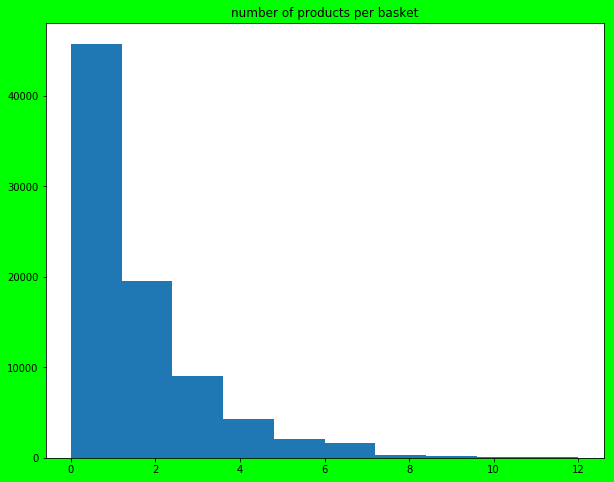

In [46]:
fig , ax =  plt.subplots(1,1,figsize=(10,8),facecolor = 'lime')
ax.hist(df_t["prd_item_unique_code"],range=[0,12],bins=10)
plt.title("number of products per basket")
plt.show()

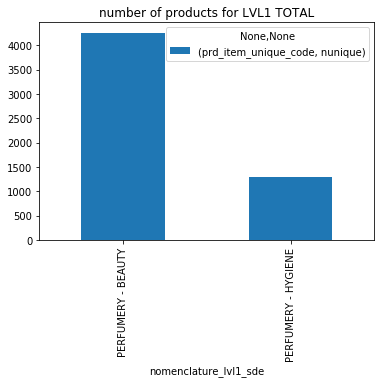

In [53]:
df[['prd_item_unique_code']].groupby(df['nomenclature_lvl1_sde']).agg(['nunique']).plot.bar(title="number of products for LVL1 TOTAL")

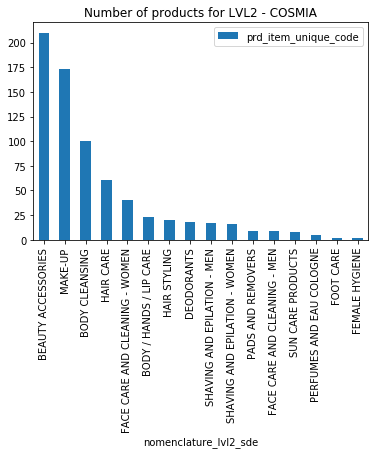

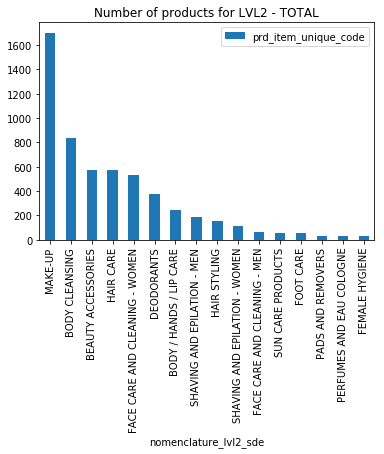

In [55]:
df.loc[df['top_ownbrand'] == 1].groupby('nomenclature_lvl2_sde')['prd_item_unique_code'] \
                            .nunique().sort_values(ascending=False).reset_index().plot.bar(x='nomenclature_lvl2_sde', title="Number of products for LVL2 - COSMIA")

df.groupby('nomenclature_lvl2_sde')['prd_item_unique_code'] \
                            .nunique().sort_values(ascending=False).reset_index().plot.bar(x='nomenclature_lvl2_sde', title="Number of products for LVL2 - TOTAL")

In [56]:
df2 = df.head(50)